In [1]:
from my_funct import confusion_matrix_info, load_clean_data, create_plot_of_feature_importances

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/churn_data.csv')

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#we need to convert our yes/no and true/false into 0's and 1's

churn_dict = {False: 0, True: 1}
yes_no_dict = {'no': 0, 'yes': 1}
df['churn'].replace(churn_dict, inplace=True)
df['international plan'].replace(yes_no_dict, inplace=True)
df['voice mail plan'].replace(yes_no_dict, inplace=True)

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
#pop off uneeded columns

df = df.drop(['phone number', 'area code'], axis=1)

df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
#lets check our target variables value count for balance

df.churn.value_counts()

#looks like we have a large imbalance, this is something we can fix using SMOTE

0    2850
1     483
Name: churn, dtype: int64

In [9]:
#let's now prepare our data for the train_test_split

X = df.drop('churn', axis=1)
y = df.churn

In [10]:
#we must import the proper packages to perform train_test_split

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021, test_size=0.20)

## Making Pipelines

In [11]:
#let's create a pipeline to do all of our preprocessing for us

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [12]:
preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                       (StandardScaler(), make_column_selector(dtype_include=np.number),
                                        SMOTE()))

preprocessing

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])

In [13]:
#fit and transform our preprocessing pipeline to our training data

preprocessing.fit_transform(X_train)

<2666x68 sparse matrix of type '<class 'numpy.float64'>'
	with 47988 stored elements in Compressed Sparse Row format>

In [14]:
#the next thing we'll do is make separate pipelines for each model we want to test
#each of these pipelines will contain our preprocessing pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_pipeline = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=2021))
rf_pipeline = make_pipeline(preprocessing, RandomForestClassifier(random_state=2021))
lr_pipeline = make_pipeline(preprocessing, LogisticRegression(random_state=2021))
et_pipeline = make_pipeline(preprocessing, ExtraTreesClassifier(random_state=2021))
kn_pipeline = make_pipeline(preprocessing, KNeighborsClassifier())

The purpose for the creation of various pipelines is to find the best performing model using our training data that can then be used to perform reliably on unseen data. In this context, we can use our best model to predict churn patterns for SyriaTel.

## Creating Our Param_Grids

In [15]:
#we need to create different param_grids for each pipeline

dt_param_grid = {
    'decisiontreeclassifier__criterion': ['entropy', 'gini'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': [2, 5, 10],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'decisiontreeclassifier__class_weight': ['none', 'balanced']
    
}

rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 1000, 2000],
    'randomforestclassifier__max_depth': [2, 5, 10]
    
}

lr_param_grid = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__dual': [True, False],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__multi_class': ['auto', 'ovr', 'multinomial'],
    'logisticregression__n_jobs': [10, 20, 30],
    'logisticregression__C': [0.01, 0.1, 0.5]
    
}

et_param_grid = {
    'extratreesclassifier__criterion': ['entropy', 'gini'],
    'extratreesclassifier__max_depth': [2, 5, 10],
    'extratreesclassifier__n_estimators': [100, 250, 500],
    'extratreesclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'extratreesclassifier__class_weight': ['none', 'balanced']
    
}

kn_param_grid = {
    'kneighborsclassifier__n_neighbors': [5, 10, 20],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [25, 50, 100],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__metric': ['minkowski', 'manhattan']
    
}

In [16]:
#we can now use each param_grid in our GridSearchCV alongside its coinciding model

## DecisionTree

In [17]:
search_dt = GridSearchCV(dt_pipeline, dt_param_grid, n_jobs=-1)

search_dt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__class_weight': ['none',
      

In [18]:
#we can check out its best parameters

search_dt.best_params_

{'decisiontreeclassifier__class_weight': 'balanced',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 'auto',
 'decisiontreeclassifier__splitter': 'best'}

In [19]:
#then assign that best model using best_estimator_ to a variable

best_dt_pipeline = search_dt.best_estimator_

In [20]:
#then check its f1 score using the training data

best_dt_cross_val = cross_val_score(best_dt_pipeline, X_train, y_train, scoring='f1')

## RandomForest

In [21]:
search_rf = GridSearchCV(rf_pipeline, rf_param_grid, n_jobs=-1)

search_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [2, 5, 10],
      

In [22]:
#we can check out its best parameters

search_rf.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 2000}

In [23]:
#then assign that best model using best_estimator_ to a variable

best_rf_pipeline = search_rf.best_estimator_

In [24]:
#then check its f1 score using the training data

best_rf_cross_val = cross_val_score(best_rf_pipeline, X_train, y_train, scoring='f1')

## LogisticRegression

In [25]:
search_lr = GridSearchCV(lr_pipeline, lr_param_grid, n_jobs=-1)

search_lr.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])),
                                       ('logisticregression',
                                        L...21))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 0.5],
                         'logisticregression__dual

In [26]:
#we can check out its best parameters

search_lr.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__dual': False,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': 10,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [27]:
#then assign that best model using best_estimator_ to a variable

best_lr_pipeline = search_lr.best_estimator_

In [28]:
#then check its f1 score using the training data

best_lr_cross_val = cross_val_score(best_lr_pipeline, X_train, y_train, scoring='f1')

## ExtraTrees

In [29]:
search_et = GridSearchCV(et_pipeline, et_param_grid, n_jobs=-1)

search_et.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'extratreesclassifier__class_weight': ['none',
            

In [30]:
#we can check out its best parameters

search_et.best_params_

{'extratreesclassifier__class_weight': 'balanced',
 'extratreesclassifier__criterion': 'gini',
 'extratreesclassifier__max_depth': 10,
 'extratreesclassifier__max_features': 'auto',
 'extratreesclassifier__n_estimators': 500}

In [31]:
#then assign that best model using best_estimator_ to a variable

best_et_pipeline = search_et.best_estimator_

In [32]:
#then check its f1 score using the training data

best_et_cross_val = cross_val_score(best_et_pipeline, X_train, y_train, scoring='f1')

## KNeighbors

In [33]:
search_kn = GridSearchCV(kn_pipeline, kn_param_grid, n_jobs=-1)

search_kn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedef0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff4dedf60>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                

In [34]:
#we can check out its best parameters

search_kn.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 25,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [35]:
#then assign that best model using best_estimator_ to a variable

best_kn_pipeline = search_kn.best_estimator_

In [36]:
#then check its f1 score using the training data

best_kn_cross_val = cross_val_score(best_kn_pipeline, X_train, y_train, scoring='f1')

## Model F1 Score Means

In [37]:
print(f"RandomForest: {best_rf_cross_val.mean()}\n DecisionTree: {best_dt_cross_val.mean()}\n KNeighbors: {best_kn_cross_val.mean()}\n LogisticRegression: {best_lr_cross_val.mean()}\n ExtraTrees: {best_et_cross_val.mean()}")

RandomForest: 0.6162381988178686
 DecisionTree: 0.49161777125440886
 KNeighbors: 0.48455377627943996
 LogisticRegression: 0.2248114677359882
 ExtraTrees: 0.6481831855744898


In [38]:
#based on this information, we chose to proceed with ExtraTrees

## Final Model

In [39]:
#refit training data onto best model

best_et_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff5470860>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ff5b8e898>)])),
                ('extratreesclassifier',
                 ExtraTreesClassifier(class_weight='balanced', max_depth=10,
                                      n_estimators=500, random_state=2021))])

In [40]:
#checking the f1 score of best model using the training and testing data
#similar for both indicating that we have a reliable model

f1_score_train_mean = best_et_cross_val.mean()
f1_score_test_mean = cross_val_score(best_et_pipeline, X_test, y_test, scoring='f1').mean()

print(f'Training F1 Score: {f1_score_train_mean}')
print(f'Testing F1 Score: {f1_score_test_mean}')

Training F1 Score: 0.6481831855744898
Testing F1 Score: 0.6179055216206919


In [41]:
from sklearn.metrics import accuracy_score

#checking the accuracy of best model using the training and testing data
#similar for both indicating that we have a reliable model

train_preds = best_et_pipeline.predict(X_train)
test_preds = best_et_pipeline.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train, train_preds)}')
print(f'Testing Accuracy: {accuracy_score(y_test, test_preds)}')

Training Accuracy: 0.9253563390847712
Testing Accuracy: 0.8665667166416792


## Final Model Confusion Matrix

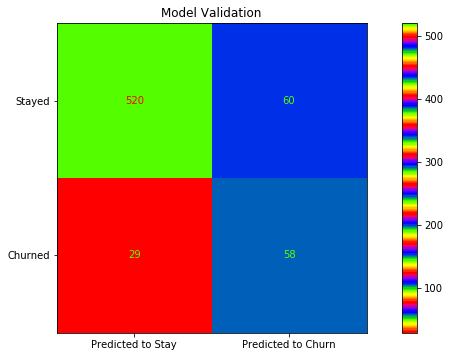

(None, <Figure size 720x360 with 2 Axes>)

<Figure size 432x288 with 0 Axes>

In [42]:
confusion_matrix_info(best_et_pipeline, X_test, y_test, save_path='images/final_confusion_matrix.png')

## Other Visualizations

In [43]:
top_17 = [('total intl calls', 0.007662110949917248),
 ('total intl charge', 0.0033470091004430204),
 ('total day charge', 0.003259961859933837),
 ('total eve minutes', 0.003162403246382117),
 ('total night calls', 0.00277449674239552),
 ('account length', 0.002581535009061759),
 ('international plan', 0.002109226781666918),
 ('voice mail plan', 0.002103748904989105),
 ('total intl minutes', 0.0018711680184347753),
 ('total eve charge', 0.0017474977005077679),
 ('total day calls', 0.0017101284391014342),
 ('total night charge', 0.001615454532337387),
 ('number vmail messages', 0.0015464521017542058),
 ('customer service calls', 0.0012120735471571925),
 ('total eve calls', 0.001163035733859368),
 ('total night minutes', 0.000949022695754378),
 ('total day minutes', 0.0009380786304271744)]

['International Plan', 'Customer Service Calls', 'Total Day Minutes']
[25.985184734548415, 20.874999878379207, 20.515082926138778]
['Total Intl Charge', 'Total Day Charge', 'Total Eve Minutes', 'Total Night Calls', 'Account Length']
[0.334700910044302, 0.3259961859933837, 0.31624032463821167, 0.277449674239552, 0.2581535009061759]


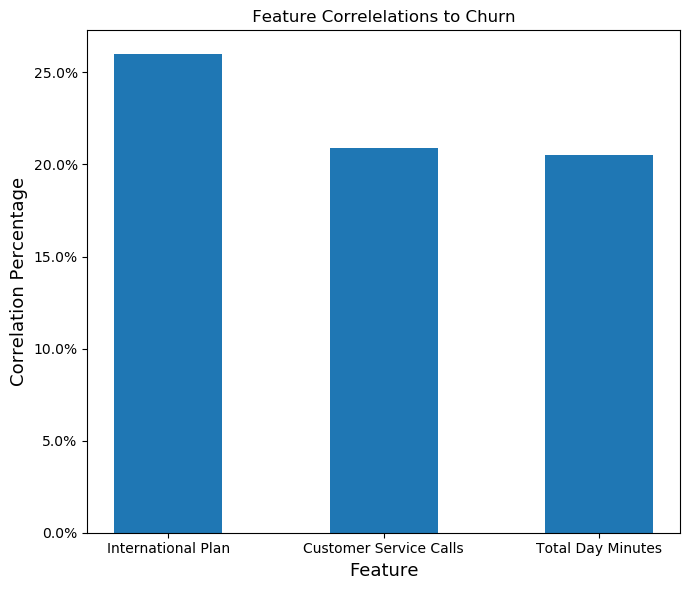

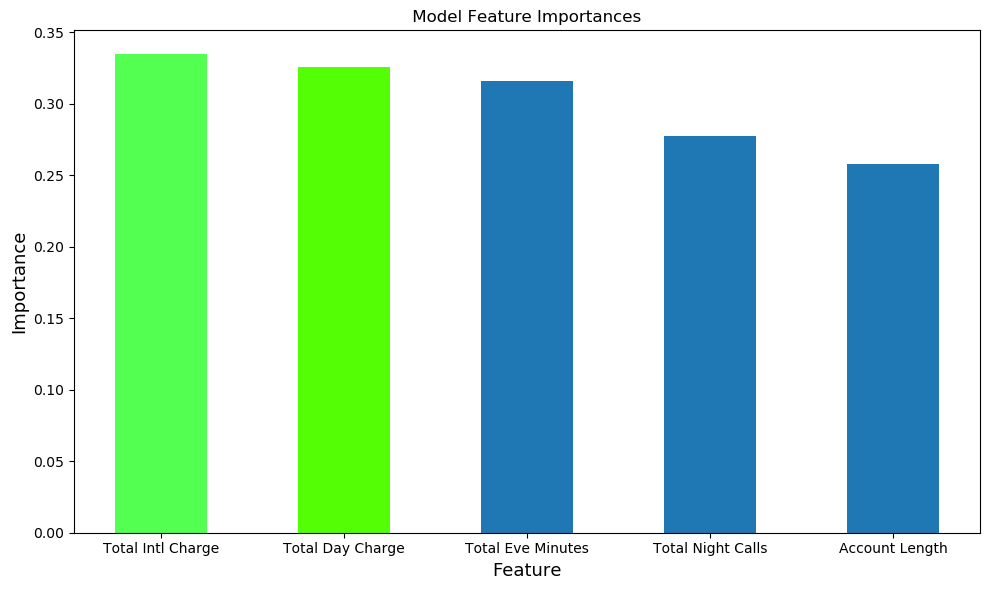

In [44]:
min_percent = 0.12
corr = df.corr().churn
corr=dict(corr)
create_plot_of_feature_importances(corr, title='Feature Correlelations to Churn', top_num=3, width=0.5, percent=True)
create_plot_of_feature_importances(dict(top_17), figsize=(10, 6), bar_colors=['#53FF50', '#54FE04', '#1F77B4', '#1F77B4', '#1F77B4','#54FE00'], top_num=5, width=0.5, title='Model Feature Importances', ylabel='Importance')

In [45]:
train_f1_scores_dict = {
    "F1 Score": [ 
        cross_val_score(best_kn_pipeline, X_train, y_train, scoring='f1').mean(),
        cross_val_score(best_rf_pipeline, X_train, y_train, scoring='f1').mean(),
        cross_val_score(best_et_pipeline, X_train, y_train, scoring='f1').mean(),
        cross_val_score(best_dt_pipeline, X_train, y_train, scoring='f1').mean()
    ]
}
train_f1_scores_df = pd.DataFrame(train_f1_scores_dict, index=["KNeighbors", "RandomForest", "ExtraTrees", "DecisionTree"])
train_f1_scores_df

,F1 Score
KNeighbors,0.484554
RandomForest,0.616238
ExtraTrees,0.648183
DecisionTree,0.491618


In [46]:
test_f1_scores_dict = {
    "F1 Score": [ 
        cross_val_score(best_kn_pipeline, X_test, y_test, scoring='f1').mean(),
        cross_val_score(best_rf_pipeline, X_test, y_test, scoring='f1').mean(),
        cross_val_score(best_et_pipeline, X_test, y_test, scoring='f1').mean(),
        cross_val_score(best_dt_pipeline, X_test, y_test, scoring='f1').mean()
    ]
}
test_f1_scores_df = pd.DataFrame(test_f1_scores_dict, index=["KNeighbors", "RandomForest", "ExtraTrees", "DecisionTree"])
test_f1_scores_df

,F1 Score
KNeighbors,0.355152
RandomForest,0.298128
ExtraTrees,0.617906
DecisionTree,0.414153
